In [11]:
import geopandas as gpd
%matplotlib inline

In [12]:
cth = r"D:\Projects\Pr\3723.10\Werkfolder\catchments_raw.shp"
cys = r"D:\Projects\Pr\3723.10\Werkfolder\ecowas_countries_WGS84.shp"

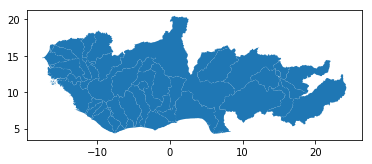

In [20]:
gdf_cth = gpd.read_file(cth)
plt1 = gdf_cth.plot()

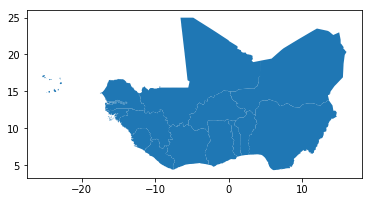

In [23]:
gdf_cys = gpd.read_file(cys)
plt2 = gdf_cys.plot()

In [26]:
import numpy as np

In [28]:
np.array([plt1.get_xlim(), plt2.get_xlim()])

array([[-19.63689733,  26.35731257],
       [-27.4264695 ,  18.0633595 ]])

In [29]:
np.array([plt1.get_ylim(), plt2.get_ylim()])

array([[ 3.4584521 , 21.31586736],
       [ 3.24100115, 26.0361428 ]])

In [30]:
xmin = -27.4264695
xmax = 26.35731257
ymin = 3.24100115
ymax = 26.0361428

In [ ]:
-27.43, 26.04

In [32]:
from siphon.catalog import TDSCatalog

In [ ]:
base = 'https://wci.earth2observe.eu/thredds/catalog/jrc/MSWEP'

In [47]:
base = TDSCatalog('https://wci.earth2observe.eu/thredds/catalog/jrc/MSWEP/daily_e2o_netcdf_convention/catalog.xml?dataset=MSWEP/daily_e2o_netcdf_convention/Rainf_daily_MSWEP_025_201412.nc')

In [48]:
base_ds = base.datasets[0]

In [49]:
ncss = base_ds.subset()

In [50]:
query = ncss.query()

In [51]:
query.all_times()
query.lonlat_box(west=-27.43, east=26.36, south=3.23, north=26.04)
query.variables('all')

var=all&temporal=all&west=-27.43&east=26.36&south=3.23&north=26.04

In [52]:
data = ncss.get_data(query)

HTTPError: Error accessing https://wci.earth2observe.eu/thredds/ncss/grid/jrc/MSWEP/daily_e2o_netcdf_convention/Rainf_daily_MSWEP_025_201412.nc?var=all&temporal=all&west=-27.43&east=26.36&south=3.23&north=26.04
Server Error (500: unknown DataType == long)

In [54]:
import netCDF4

In [55]:
ds = netCDF4.Dataset('https://wci.earth2observe.eu/thredds/dodsC/jrc/MSWEP/daily_e2o_netcdf_convention/Rainf_daily_MSWEP_025_201412.nc')

In [64]:
ds.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  standard_name: latitude
                  axis: Y
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (720,)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: seconds since 2014-12-01 00:00:00
                  long_name: time: mean (interval: 0h-21h UTC)
                  standard_name: time: mean (interval: 0h-21h UTC)
                  calendar: standard
                  axis: T
                  _ChunkSizes: 1048576
              unlimited dimensions: time
              current shape = (31,)
              filling off), ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  axis: X
                  long_name: longitude
                  standard_name: longitude
        

In [63]:
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]

In [65]:
rainf = ds.variables['Rainf'][:]

In [70]:
import matplotlib.pyplot as plt

In [109]:
lon.data[709:824]

array([-2.625, -2.375, -2.125, -1.875, -1.625, -1.375, -1.125, -0.875,
       -0.625, -0.375, -0.125,  0.125,  0.375,  0.625,  0.875,  1.125,
        1.375,  1.625,  1.875,  2.125,  2.375,  2.625,  2.875,  3.125,
        3.375,  3.625,  3.875,  4.125,  4.375,  4.625,  4.875,  5.125,
        5.375,  5.625,  5.875,  6.125,  6.375,  6.625,  6.875,  7.125,
        7.375,  7.625,  7.875,  8.125,  8.375,  8.625,  8.875,  9.125,
        9.375,  9.625,  9.875, 10.125, 10.375, 10.625, 10.875, 11.125,
       11.375, 11.625, 11.875, 12.125, 12.375, 12.625, 12.875, 13.125,
       13.375, 13.625, 13.875, 14.125, 14.375, 14.625, 14.875, 15.125,
       15.375, 15.625, 15.875, 16.125, 16.375, 16.625, 16.875, 17.125,
       17.375, 17.625, 17.875, 18.125, 18.375, 18.625, 18.875, 19.125,
       19.375, 19.625, 19.875, 20.125, 20.375, 20.625, 20.875, 21.125,
       21.375, 21.625, 21.875, 22.125, 22.375, 22.625, 22.875, 23.125,
       23.375, 23.625, 23.875, 24.125, 24.375, 24.625, 24.875, 25.125,
      

In [123]:
len(lat.data[371:464])

93

In [84]:
-167.125 - -167.375

0.25

In [96]:
-27.375 +0.125

-27.25

In [85]:
-167.125+0.125

-167.0

In [ ]:
west=-27.43, east=26.36, south=3.23, north=26.04

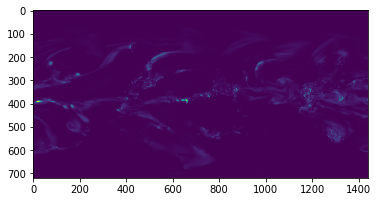

In [77]:
plt.imshow(rainf[0])

ValueError: too many values to unpack (expected 2)

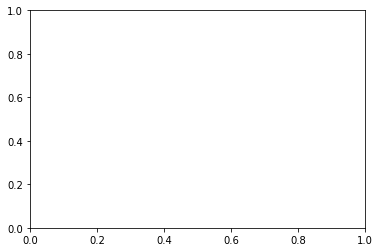

In [68]:
matplotlib.pyplot.pcolormesh(lon,lat,rainf)

In [66]:
rainf

masked_array(
  data=[[[2.9802322e-08, 2.9802322e-08, 2.9802322e-08, ...,
          2.9802322e-08, 2.9802322e-08, 2.9802322e-08],
         [2.9802322e-08, 2.9802322e-08, 2.9802322e-08, ...,
          2.9802322e-08, 2.9802322e-08, 2.9802322e-08],
         [3.7252903e-08, 3.7252903e-08, 3.7252903e-08, ...,
          3.7252903e-08, 3.7252903e-08, 3.7252903e-08],
         ...,
         [4.1499734e-06, 4.1574240e-06, 4.1648746e-06, ...,
          4.1425228e-06, 4.1425228e-06, 4.1425228e-06],
         [4.0978193e-06, 4.0978193e-06, 4.0978193e-06, ...,
          4.0903687e-06, 4.0903687e-06, 4.0903687e-06],
         [4.0978193e-06, 4.0978193e-06, 4.0978193e-06, ...,
          4.0903687e-06, 4.0903687e-06, 4.0903687e-06]],

        [[9.6857548e-08, 9.6857548e-08, 9.6857548e-08, ...,
          9.6857548e-08, 9.6857548e-08, 9.6857548e-08],
         [9.6857548e-08, 9.6857548e-08, 9.6857548e-08, ...,
          9.6857548e-08, 9.6857548e-08, 9.6857548e-08],
         [8.9406967e-08, 8.9406967e-08, 8.

In [ ]:
'http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best'

In [ ]:
base_url = 'http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/'

if catalog == 'best':
    time_name_index_location = 1
    best_gfs = TDSCatalog('{}{}'.format(base_url, 'catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best'))
if catalog == 'latest':
    time_name_index_location = 0
    best_gfs = TDSCatalog('{}{}'.format(base_url, 'latest.xml'))

#print(list(best_gfs.datasets))    

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

# setup query for waddensea region collecting u- and v-components
query = ncss.query()
query.all_times()
query.lonlat_box(north=53.66, south=52.86, east=7.28, west=4.59)
query.accept('netcdf4')
query.variables('u-component_of_wind_height_above_ground','v-component_of_wind_height_above_ground')
query.vertical_level(10)

data = ncss.get_data(query)